# **Import Libraries and modules**

Installation and importing of packages used by the network

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

display the x_train[0] value using the matplotlib library

(60000, 28, 28)


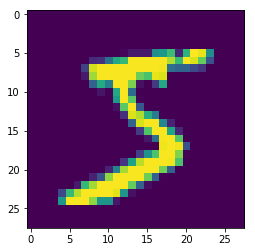

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])


reshaping the train and test data to a format with width ,height and channels.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

preprossing the train and test data to the 32-bit precision and dividing the it by 255 to normalize the date between 0.0 to 1.0 .

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

display the y training data

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

The y train and test data are converted into one hot encoding by using the keras function.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

> added the batch normalization 
> incresed the epoch to 20

In [10]:
from keras.layers import Activation
model = Sequential()
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26 
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu'))#24
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu'))#22
model.add(MaxPooling2D(pool_size=(2,2))) #11
model.add(Convolution2D(10, 1, 1, activation='relu')) #11
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Convolution2D(10, 1,activation='relu')) # 7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7)) 
model.add(BatchNormalization())
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # This is added back by I

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        210       
__________

The given architecture has the following output

28x28X1 | 3x3X1x10 | 26x26x10 -> 3x3 receptive field

26x26x10 |3x3x10 |24x24x10--> 5x5 receptive field

24x24x10 |3x3x20 | 22x22x20--> 7x7 receptive field
 
22x22x20 | 1x1x10| 22x22x20 -> 7x7 receptive field

11x11x10 |3x3x10 | 9x9x10--> 9x9 receptive field

9x9x10 |3x3x20 | 7x7x20--> 11x11 receptive field

7x7x20 |1x1x10 |7x7x20--> 11x11 receptive field

7x7x20 |7x7x10 |1x1x10--> 15x15 receptive field



compile is used to configure the learning parameters.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

traing the model using the input data X_train , Y_train with the batch size 46 and epoch 10 and verbose 1. where batch size is the number images it has to considered for the each training. epochs is the number of times the modal has to run.

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 25s 421us/step - loss: 0.3887 - acc: 0.9325
Epoch 2/20
60000/60000 [==============================] - 22s 365us/step - loss: 0.1488 - acc: 0.9711
Epoch 3/20
60000/60000 [==============================] - 22s 362us/step - loss: 0.1023 - acc: 0.9779
Epoch 4/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.0791 - acc: 0.9816
Epoch 5/20
60000/60000 [==============================] - 24s 395us/step - loss: 0.0641 - acc: 0.9847
Epoch 6/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.0537 - acc: 0.9865
Epoch 7/20
60000/60000 [==============================] - 21s 357us/step - loss: 0.0485 - acc: 0.9878
Epoch 8/20
60000/60000 [==============================] - 22s 360us/step - loss: 0.0424 - acc: 0.9887
Epoch 9/20
60000/60000 [==============================] - 22s 371us/step - loss: 0.0385 - acc: 0.9899
Epoch 10/20
60000/60000 [==============================] - 21s 356us/step - loss: 

evaluate is used to calculate the loss and the accuracy of the input data.

In [14]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 77us/step


In [15]:
print(score)

[0.027961667521041816, 0.9915]


predict is used to generate the accuracy of the input data.

In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[4.2728680e-05 6.8464899e-05 2.6119565e-07 7.8319666e-05 3.8387657e-06
  4.6181221e-06 2.5018473e-06 9.9979037e-01 5.9400427e-06 2.9746629e-06]
 [2.6072034e-06 4.6750179e-06 9.9989855e-01 1.3862827e-05 8.9451369e-08
  3.1134935e-08 1.0756401e-05 2.1920030e-05 1.7096379e-07 4.7414458e-05]
 [7.8759531e-06 9.9996591e-01 6.3685889e-07 2.3864031e-06 3.8324725e-07
  5.4319494e-06 2.0757329e-06 1.4481452e-05 6.7289380e-07 2.0750569e-07]
 [9.9993670e-01 2.2955426e-06 2.4380290e-06 3.5207468e-06 3.1817260e-07
  7.5158262e-08 1.6865790e-05 1.4323122e-05 1.8855815e-05 4.6159007e-06]
 [1.8417752e-05 5.6611825e-05 2.9038900e-05 5.4115435e-07 9.9972385e-01
  2.6199781e-05 1.7738534e-05 4.7186865e-07 3.6204124e-06 1.2347083e-04]
 [1.1754553e-05 9.9997509e-01 2.0459045e-06 1.4709210e-06 1.2357206e-06
  1.5005432e-06 1.3031749e-06 4.8781180e-06 3.0326538e-07 2.3716740e-07]
 [5.1865487e-07 2.0166601e-05 2.6368509e-05 4.6793505e-07 9.9990427e-01
  2.5968542e-05 5.6115590e-07 3.4230683e-07 1.6820461e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

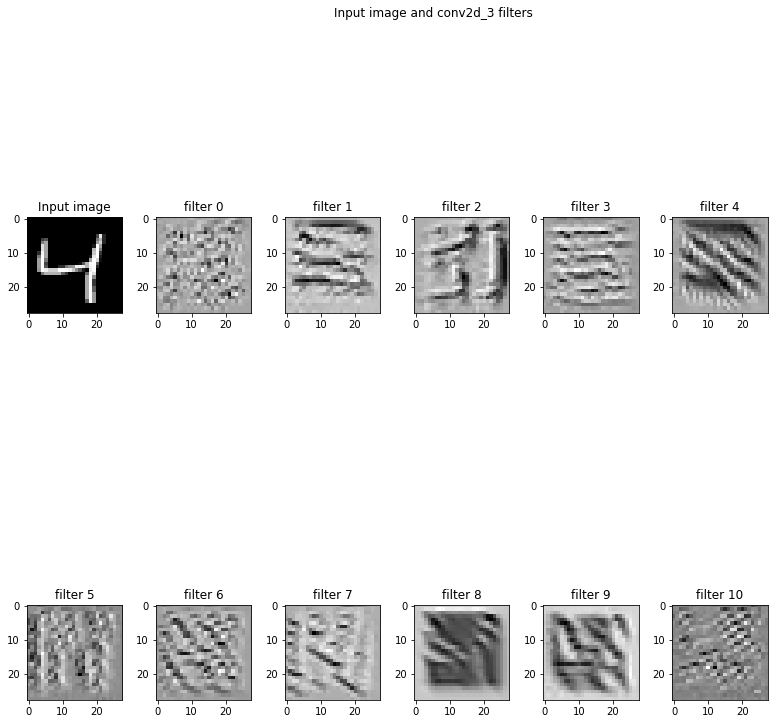

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()